In [1]:
#from scipy.stats import beta
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import scipy.stats as stats

In [2]:
def hist_plot(samples):
    ticks = ('','10%','','20%','','30%','','40%','','50%','','60%','','70%','','80%','','90%','','100%')
    y_pos = np.arange(len(ticks))/20

    plt.hist(samples, 20, range=(0,1), rwidth=0.7, color=(0.2, 0.4, 0.6, 0.6), weights=np.ones(len(samples))/len(samples))
    plt.xticks(y_pos, ticks)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

# Distribución Binomial

(0.0, 0.2)

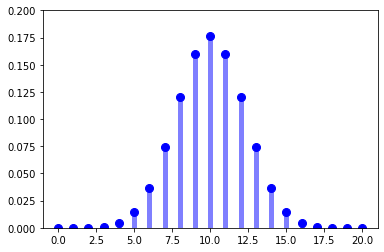

In [3]:
n=20
p=0.5

x = np.arange(0,21)
plt.plot(x, stats.binom.pmf(x,n,p), 'bo', ms=8)
plt.vlines(x,0, stats.binom.pmf(x,n,p), colors="b", lw=5, alpha=0.5)
plt.ylim(0,0.2)

#Distribución Uniforme

(0.0, 5.0)

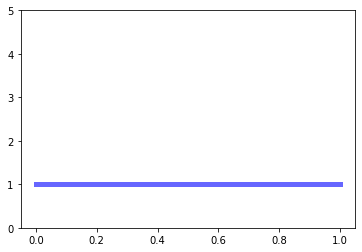

In [4]:
a=1
b=1

x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, a, b), 'b-', lw=5, alpha=0.6)
plt.ylim(0,5)

# Distribución Normal

(0.0, 5.0)

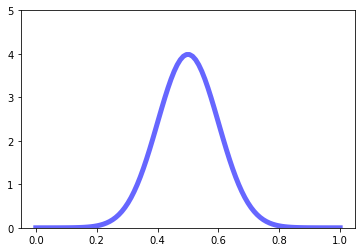

In [5]:
mu=0.5
sigma=0.1

x = np.linspace(0,1,100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'b-', lw=5, alpha=0.6)
plt.ylim(0,5)

# Distribución Normal estándar

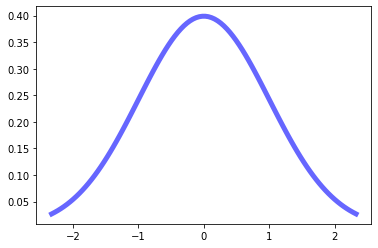

In [6]:
a, b = -5, 5
x = np.linspace(stats.truncnorm.ppf(0.01, a, b),
                stats.truncnorm.ppf(0.99, a, b), 100)
plt.plot(x, stats.truncnorm.pdf(x, a, b),
       'b-', lw=5, alpha=0.6, label='truncnorm pdf')

# DIstribución Beta

(0.0, 5.0)

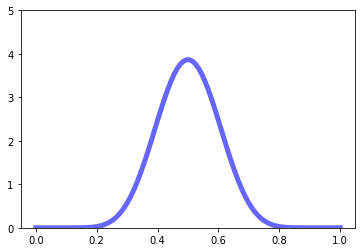

In [7]:
a=12
b=12

x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, a, b), 'b-', lw=5, alpha=0.6)
plt.ylim(0,5)

(0.0, 5.0)

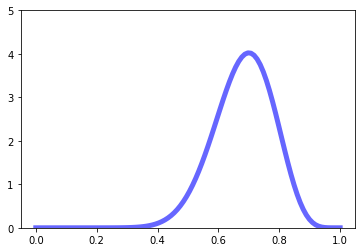

In [8]:
a=15
b=7

x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, a, b), 'b-', lw=5, alpha=0.6)
plt.ylim(0,5)

# Distribución a posteriori exacta

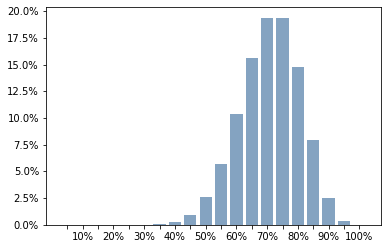

In [9]:
a, b = 1+14, 1+6

x = np.linspace(0,1, 21)
cdf_beta = stats.beta.cdf(x, a, b)
pdf_beta = [cdf_beta[i+1] - cdf_beta[i] for i in range(len(cdf_beta)-1)]
ticks = ('','10%','','20%','','30%','','40%','','50%','','60%','','70%','','80%','','90%','','100%')
y_pos = np.arange(len(ticks))

plt.bar(y_pos, pdf_beta, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, ticks)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [10]:
# Test de Hipótesis

a=15
b=7

print("Probability of p>0.5: {}".format(1-stats.beta.cdf(0.5,a,b)))
print("Probability of p>0.6: {}".format(1-stats.beta.cdf(0.6,a,b)))
print("Probability of p>0.7: {}".format(1-stats.beta.cdf(0.7,a,b)))


Probability of p>0.5: 0.9608230590820312
Probability of p>0.6: 0.7997540077480917
Probability of p>0.7: 0.449481882625109


# Muestreo por rechazo - Rejection Sampling

### 1.000 iteraciones

In [11]:
n = 20
h = 14
it = 1000
samples = list()

In [12]:
for _ in range(it):
    prior_sample = np.random.beta(1,1)
    heads_sample = np.random.binomial(n,prior_sample)
    if heads_sample == h:
        samples.append(prior_sample)

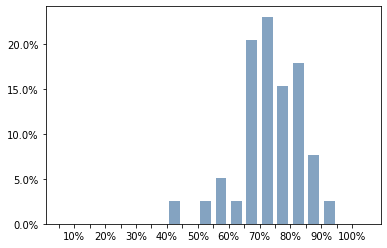

In [13]:
 hist_plot(samples)

### 10.000 iteraciones

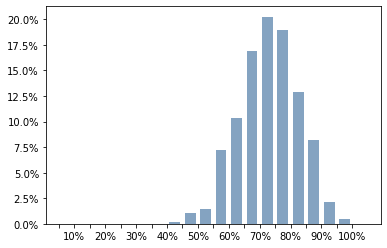

In [14]:
n = 20
h = 14
it = 10000
samples = list()

for _ in range(it):
    prior_sample = np.random.beta(1,1)
    heads_sample = np.random.binomial(n,prior_sample)
    if heads_sample == h:
        samples.append(prior_sample)
        
hist_plot(samples)

### 100.000 iteraciones

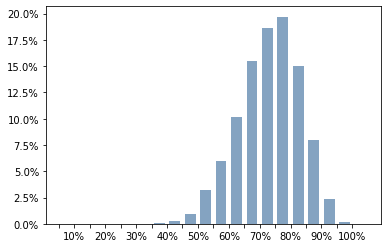

In [15]:
n = 20
h = 14
it = 100000
samples = list()

for _ in range(it):
    prior_sample = np.random.beta(1,1)
    heads_sample = np.random.binomial(n,prior_sample)
    if heads_sample == h:
        samples.append(prior_sample)
hist_plot(samples)

In [16]:
print("Proportion of accepted samples: {}".format(len(samples)/it))

Proportion of accepted samples: 0.04852


# Metropolis - Hastings

### 1.000 iteraciones

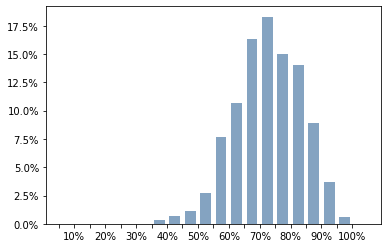

In [17]:
n = 20
h = 14
it = 1000
samples = list()
current_sample = 0.5
rejection_count = 0

for i in range(it):
    prop_sample = max(0,min(1,np.random.normal(current_sample,0.1)))
    #prop_sample = np.random.beta(1,1)
    current_prob = stats.binom.pmf(h, n, current_sample)
    prop_prob = stats.binom.pmf(h, n, prop_sample)
    accept_ratio = prop_prob / current_prob
    rand = np.random.uniform()
    if rand <= accept_ratio:
        current_sample = prop_sample
    else:
        rejection_count += 1
    samples.append(current_sample)
    
hist_plot(samples)

### 10.000 iteraciones

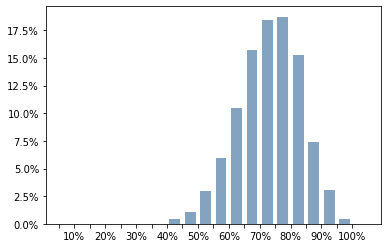

In [18]:
n = 20
h = 14
it = 10000
samples = list()
current_sample = 0.5
rejection_count = 0

for i in range(it):
    prop_sample = max(0,min(1,np.random.normal(current_sample,0.1)))
    #prop_sample = np.random.beta(1,1)
    current_prob = stats.binom.pmf(h, n, current_sample)
    prop_prob = stats.binom.pmf(h, n, prop_sample)
    accept_ratio = prop_prob / current_prob
    rand = np.random.uniform()
    if rand <= accept_ratio:
        current_sample = prop_sample
    else:
        rejection_count += 1
    samples.append(current_sample)
hist_plot(samples)

### 100.000 iteraciones

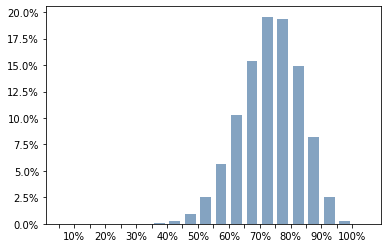

In [19]:
n = 20
h = 14
it = 100000
samples = list()
current_sample = 0.5
rejection_count = 0

for i in range(it):
    prop_sample = max(0,min(1,np.random.normal(current_sample,0.1)))
    #prop_sample = np.random.beta(1,1)
    current_prob = stats.binom.pmf(h, n, current_sample)
    prop_prob = stats.binom.pmf(h, n, prop_sample)
    accept_ratio = prop_prob / current_prob
    rand = np.random.uniform()
    if rand <= accept_ratio:
        current_sample = prop_sample
    else:
        rejection_count += 1
    samples.append(current_sample)
hist_plot(samples)

In [20]:
print("Proportion of accepted samples: {}".format(1-rejection_count/it))

Proportion of accepted samples: 0.70129
